In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!unzip "/content/dataset.zip"

In [ ]:
path = "/content/Original_Dataset/Train_Input/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
input_files = sorted_files_list

In [ ]:
features_list = []
for file_name in input_files:
  file_path = os.path.join(path,file_name)
  input_features_row = [i.strip().split() for i in open(file_path).readlines()]
  input_features_row = np.array(input_features_row).reshape(-1).tolist()
  input_features_row = [float(a) for a in input_features_row]
  features_list.append(np.array(input_features_row))
  pass

In [ ]:
features = np.asarray(features_list)
print(features.shape)

(686, 138)


In [ ]:
path = "/content/Original_Dataset/Train_Output/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
output_files = sorted_files_list

In [ ]:
output_list = []
for file_name in output_files:
  file_path = os.path.join(path,file_name)
  output_row = [i.strip().split() for i in open(file_path).readlines()]
  # output_row = np.array([a[1:-1] for a in output_row]).reshape(-1).tolist()
  output_row = np.array([a for a in output_row]).reshape(-1).tolist()
  output_row = [float(x) for x in output_row]
  output_list.append(np.array(output_row))
  pass

In [ ]:
output_array = np.asarray(output_list)
print(output_array.shape)

(686, 4)


In [ ]:
x_train, y_train = features,output_array

In [ ]:
print(x_train.shape, y_train.shape)

(686, 138) (686, 4)


**Validation dataset**

In [ ]:
path = "/content/Original_Dataset/Validation_Input/"

files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
validation_input_files = sorted_files_list

In [ ]:
validation_features_list = []

for file_name in validation_input_files:
  file_path = os.path.join(path,file_name)
  validation_features_row = [i.strip().split() for i in open(file_path).readlines()]
  validation_features_row = np.array(validation_features_row).reshape(-1).tolist()
  validation_features_row = [float(x) for x in validation_features_row]
  validation_features_list.append(np.array(validation_features_row))
  pass

In [ ]:
x_val = np.asarray(validation_features_list)

In [ ]:
path = "/content/Original_Dataset/Validation_Output/"
files_list = os.listdir(path)
# sorted_files_list = sorted(files_list,key=lambda item: int (item.split(".")[0]))
sorted_files_list = sorted(files_list)
validation_output_files = sorted_files_list

In [ ]:
validation_output_list = []
for file_name in validation_output_files:
  file_path = os.path.join(path,file_name)
  validation_output_row = [i.strip().split() for i in open(file_path).readlines()]
  # validation_output_row = np.array([a[1:-1] for a in validation_output_row]).reshape(-1).tolist()
  validation_output_row = np.array([a for a in validation_output_row]).reshape(-1).tolist()
  validation_output_row = [float(x) for x in validation_output_row]
  validation_output_list.append(np.array(validation_output_row))
  pass

In [ ]:
y_val = np.asarray(validation_output_list)

In [ ]:
print(x_val.shape, y_val.shape)

(61, 138) (61, 4)


---
### ***Applying GAN***

In [ ]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D, Conv1D, Conv1DTranspose, MaxPooling1D, Flatten, Input, Reshape,LeakyReLU
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


**Discriminator**

In [ ]:
# define the discriminator model
def define_discriminator(n_inputs=(138,1)):
 model = Sequential()
 model.add(Input(shape = n_inputs))
 #model.add(Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
 #model.add(Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv1D(filters=8, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Conv1D(filters=4, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))

 # compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
model = define_discriminator(n_inputs=(138,1))

print(model.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 136, 8)            32        
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 68, 8)             0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 66, 4)             100       
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 33, 4)             0         
 ng1D)                                                           
                                                                 
 flatten_31 (Flatten)        (None, 132)               0         
                                                                 
 dense_44 (Dense)            (None, 32)              

**Generator**

In [ ]:
# # define the generator model

# def define_generator(latent_dim, n_outputs=138):
#  model = Sequential()
#  model.add(Dense(64, kernel_initializer='he_uniform', input_dim=latent_dim))
#  model.add(Dense(64, kernel_initializer='he_uniform'))
#  model.add(Reshape((8,8)))
#  model.add(Conv1DTranspose(64, kernel_size = 2, strides=2, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))
#  #model.add(Conv1D(filters=32, kernel_size=3, kernel_initializer='he_uniform'))
#  model.add(Conv1DTranspose(32, kernel_size = 2, strides=2, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))
#  #model.add(Conv1D(filters=16, kernel_size=3, kernel_initializer='he_uniform'))
#  model.add(Conv1DTranspose(16, kernel_size = 2, strides=2, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))
#  #model.add(Conv1D(filters=8, kernel_size=3, kernel_initializer='he_uniform'))
#  model.add(Conv1DTranspose(8, kernel_size = 2, strides=2, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))
#  #model.add(Conv1D(filters=4, kernel_size=3, kernel_initializer='he_uniform'))
#  model.add(Conv1DTranspose(4, kernel_size = 2, strides=1, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))
#  model.add(Conv1DTranspose(2, kernel_size = 2, strides=1, padding='same', kernel_initializer='he_uniform'))
#  model.add(LeakyReLU(alpha=0.2))

#  model.add(Flatten())
#  model.add(Dense(n_outputs))
#  model.add(Reshape((n_outputs,1)))
#  model.add(Conv1D(filters=1, kernel_size=1, activation='linear', kernel_initializer='he_uniform'))
#  return model

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=138):
 model = Sequential()
 model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
 model.add(Reshape((8,8)))
 model.add(Conv1DTranspose(8, kernel_size = 2, strides=2, padding='same', kernel_initializer='he_uniform'))
 model.add(LeakyReLU(alpha=0.2))
 #model.add(Conv1D(filters=16, kernel_size=3, kernel_initializer='he_uniform'))
 #model.add(LeakyReLU(alpha=0.2))
 model.add(Flatten())
 model.add(Dense(n_outputs, activation='linear'))
 model.add(Reshape((n_outputs,1)))
 return model

In [ ]:
model = define_generator(latent_dim = 50, n_outputs=138)

print(model.summary())

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                3264      
                                                                 
 reshape_24 (Reshape)        (None, 8, 8)              0         
                                                                 
 conv1d_transpose_12 (Conv1  (None, 16, 8)             136       
 DTranspose)                                                     
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 16, 8)             0         
                                                                 
 flatten_34 (Flatten)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 138)               17802     
                                                     

**Complete GAN model**

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):

 # make weights in the discriminator not trainable
 discriminator.trainable = False
 model = Sequential()

 # add generator
 model.add(generator)

 # add the discriminator
 model.add(discriminator)

 # compile model
 model.compile(loss='binary_crossentropy', optimizer='adam')
 return model

**GAN Architecture diagram**

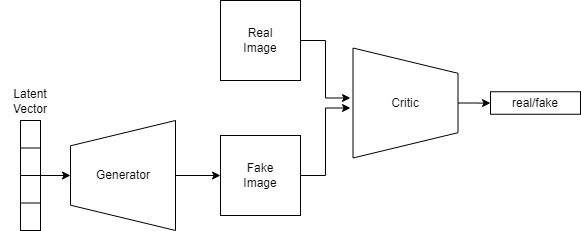

**Generate Real Samples**

In [ ]:
def generate_real_samples(dataset, n_samples):
	# choose random images
	ix = randint(0, dataset.shape[0], n_samples)
	# select the random images and assign it to X
	X = dataset[ix]
	# generate class labels and assign to y
	y = ones((n_samples, 1)) ##Label=1 indicating they are real
	return X, y

**Fake Samples**

Latent Space

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
 # generate points in the latent space
 x_input = randn(latent_dim * n)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n, latent_dim)
 return x_input

**Generate Fake Samples**

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n)
 # predict outputs
 X = generator.predict(x_input,verbose=0)
 # create class labels
 y = zeros((n, 1))
 return X, y

**Performance Evaluation**

In [ ]:
def summarize_performance(epoch, generator, discriminator, latent_dim, dataset, n=100):
 # prepare real samples
 x_real, y_real = generate_real_samples(dataset, n)
 # evaluate discriminator on real examples
 _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
 # prepare fake examples
 x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
 # evaluate discriminator on fake examples
 _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
 # summarize discriminator performance
 print("\nEpoch -> ",epoch + 1, "\nReal samples Accuracy = ", acc_real, "Fake samples Accuracy = ", acc_fake)
 # saving models
 discriminator.save("/content/discriminator.h5")
 generator.save("/content/generator.h5")

**Defining training function**

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, dataset, n_epochs=10000, n_batch=128, n_eval=100):

 print("Discriminator training started........\n")
 # determine half the size of one batch, for updating the discriminator
 half_batch = int(n_batch / 2)
 # manually enumerate epochs
 for i in range(n_epochs):
  # prepare real samples
  x_real, y_real = generate_real_samples(dataset, half_batch)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
  # update discriminator
  d_model.train_on_batch(x_real, y_real) # training on half real
  d_model.train_on_batch(x_fake, y_fake) # training on half fake
  # prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
  # create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
  # update the generator via the discriminator's error (Generator training)
  gan_model.train_on_batch(x_gan, y_gan)
  # evaluate the model every n_eval epochs
  # Print losses on this batch
  if (i+1) % n_eval == 0:
    summarize_performance(i, g_model, d_model, latent_dim, dataset, n = half_batch)
    pass
  pass


**reshaping dataset for convolution GAN**

In [ ]:
dataset = np.expand_dims(x_train, axis=2)

In [ ]:
print("Before reshape train data set shape:\n", x_train.shape)
print("After reshape train data set shape:\n", dataset.shape)
print("Each Sample shape:\n",dataset[0].shape)

Before reshape train data set shape:
 (686, 138)
After reshape train data set shape:
 (686, 138, 1)
Each Sample shape:
 (138, 1)


**Training**

In [ ]:
# size of the latent space
latent_dim = 50
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)

#dataset = x_train

no_of_batches = dataset.shape[0] # (686)
# train model
train(generator, discriminator, gan_model, latent_dim, dataset, n_batch = no_of_batches)

Discriminator training started........




Epoch ->  100 
Real samples Accuracy =  1.0 Fake samples Accuracy =  1.0



Epoch ->  200 
Real samples Accuracy =  0.9970845580101013 Fake samples Accuracy =  1.0



Epoch ->  300 
Real samples Accuracy =  0.8046647310256958 Fake samples Accuracy =  1.0



Epoch ->  400 
Real samples Accuracy =  0.6268221735954285 Fake samples Accuracy =  0.8658891916275024



Epoch ->  500 
Real samples Accuracy =  0.42274051904678345 Fake samples Accuracy =  0.7638484239578247



Epoch ->  600 
Real samples Accuracy =  0.4810495674610138 Fake samples Accuracy =  0.46064141392707825



Epoch ->  700 
Real samples Accuracy =  0.5451894998550415 Fake samples Accuracy =  0.6443148851394653



Epoch ->  800 
Real samples Accuracy =  0.7842565774917603 Fake samples Accuracy =  0.5860058069229126



Epoch ->  900 
Real samples Accuracy =  0.4577259421348572 Fake samples Accuracy =  0.8338192701339722



Epoch ->  1000 
Real samples Accuracy =  0.3090378940105438 Fake samples Accuracy =  0.3265306055545807



Epoch ->  1100 
Real samples Accuracy =  0.27988338470458984 Fake samples Accuracy =  0.6676384806632996



Epoch ->  1200 
Real samples Accuracy =  0.4052478075027466 Fake samples Accuracy =  0.6734693646430969



Epoch ->  1300 
Real samples Accuracy =  0.7696793079376221 Fake samples Accuracy =  0.6297376155853271



Epoch ->  1400 
Real samples Accuracy =  0.6793003082275391 Fake samples Accuracy =  0.8309037685394287



Epoch ->  1500 
Real samples Accuracy =  0.6005830764770508 Fake samples Accuracy =  0.4839650094509125



Epoch ->  1600 
Real samples Accuracy =  0.5539358854293823 Fake samples Accuracy =  0.7463557124137878



Epoch ->  1700 
Real samples Accuracy =  0.6763848662376404 Fake samples Accuracy =  0.8163265585899353



Epoch ->  1800 
Real samples Accuracy =  0.495626837015152 Fake samples Accuracy =  0.2711370289325714



Epoch ->  1900 
Real samples Accuracy =  0.352769672870636 Fake samples Accuracy =  0.8542274236679077



Epoch ->  2000 
Real samples Accuracy =  0.556851327419281 Fake samples Accuracy =  0.7142857313156128



Epoch ->  2100 
Real samples Accuracy =  0.5189504623413086 Fake samples Accuracy =  0.8221574425697327



Epoch ->  2200 
Real samples Accuracy =  0.6763848662376404 Fake samples Accuracy =  0.4052478075027466



Epoch ->  2300 
Real samples Accuracy =  0.3790087401866913 Fake samples Accuracy =  0.5947521924972534



Epoch ->  2400 
Real samples Accuracy =  0.5306122303009033 Fake samples Accuracy =  0.5422740578651428



Epoch ->  2500 
Real samples Accuracy =  0.3469387888908386 Fake samples Accuracy =  0.4285714328289032



Epoch ->  2600 
Real samples Accuracy =  0.5451894998550415 Fake samples Accuracy =  0.41982507705688477



Epoch ->  2700 
Real samples Accuracy =  0.4314868748188019 Fake samples Accuracy =  0.6122449040412903



Epoch ->  2800 
Real samples Accuracy =  0.48688048124313354 Fake samples Accuracy =  0.7230320572853088



Epoch ->  2900 
Real samples Accuracy =  0.4927113652229309 Fake samples Accuracy =  0.6997084617614746



Epoch ->  3000 
Real samples Accuracy =  0.524781346321106 Fake samples Accuracy =  0.7842565774917603



Epoch ->  3100 
Real samples Accuracy =  0.4839650094509125 Fake samples Accuracy =  0.8104956150054932



Epoch ->  3200 
Real samples Accuracy =  0.47230321168899536 Fake samples Accuracy =  0.5481049418449402



Epoch ->  3300 
Real samples Accuracy =  0.42274051904678345 Fake samples Accuracy =  0.9067055583000183



Epoch ->  3400 
Real samples Accuracy =  0.4431487023830414 Fake samples Accuracy =  0.728863000869751



Epoch ->  3500 
Real samples Accuracy =  0.6209912300109863 Fake samples Accuracy =  0.7900874614715576



Epoch ->  3600 
Real samples Accuracy =  0.49854227900505066 Fake samples Accuracy =  0.7317784428596497



Epoch ->  3700 
Real samples Accuracy =  0.4169096350669861 Fake samples Accuracy =  0.6093294620513916



Epoch ->  3800 
Real samples Accuracy =  0.6530612111091614 Fake samples Accuracy =  0.7405247688293457



Epoch ->  3900 
Real samples Accuracy =  0.3090378940105438 Fake samples Accuracy =  0.9504373073577881



Epoch ->  4000 
Real samples Accuracy =  0.5451894998550415 Fake samples Accuracy =  0.7842565774917603



Epoch ->  4100 
Real samples Accuracy =  0.6763848662376404 Fake samples Accuracy =  0.8425655961036682



Epoch ->  4200 
Real samples Accuracy =  0.6268221735954285 Fake samples Accuracy =  0.7930029034614563



Epoch ->  4300 
Real samples Accuracy =  0.6064140200614929 Fake samples Accuracy =  0.8075801730155945



Epoch ->  4400 
Real samples Accuracy =  0.5276967883110046 Fake samples Accuracy =  0.34402331709861755



Epoch ->  4500 
Real samples Accuracy =  0.6618075966835022 Fake samples Accuracy =  1.0



Epoch ->  4600 
Real samples Accuracy =  0.7638484239578247 Fake samples Accuracy =  1.0



Epoch ->  4700 
Real samples Accuracy =  0.7638484239578247 Fake samples Accuracy =  1.0



Epoch ->  4800 
Real samples Accuracy =  0.7172011733055115 Fake samples Accuracy =  1.0



Epoch ->  4900 
Real samples Accuracy =  0.4548105001449585 Fake samples Accuracy =  0.8717201352119446



Epoch ->  5000 
Real samples Accuracy =  0.5947521924972534 Fake samples Accuracy =  0.8483964800834656



Epoch ->  5100 
Real samples Accuracy =  0.6822157502174377 Fake samples Accuracy =  0.9708454608917236



Epoch ->  5200 
Real samples Accuracy =  0.6122449040412903 Fake samples Accuracy =  0.9766764044761658



Epoch ->  5300 
Real samples Accuracy =  0.6034985184669495 Fake samples Accuracy =  0.9970845580101013



Epoch ->  5400 
Real samples Accuracy =  0.7842565774917603 Fake samples Accuracy =  1.0



Epoch ->  5500 
Real samples Accuracy =  0.737609326839447 Fake samples Accuracy =  1.0



Epoch ->  5600 
Real samples Accuracy =  0.7667638659477234 Fake samples Accuracy =  0.8396501541137695



Epoch ->  5700 
Real samples Accuracy =  0.5539358854293823 Fake samples Accuracy =  0.8629737496376038



Epoch ->  5800 
Real samples Accuracy =  0.7580174803733826 Fake samples Accuracy =  0.8688046932220459



Epoch ->  5900 
Real samples Accuracy =  0.6180757880210876 Fake samples Accuracy =  1.0



Epoch ->  6000 
Real samples Accuracy =  0.6938775777816772 Fake samples Accuracy =  0.9475218653678894



Epoch ->  6100 
Real samples Accuracy =  0.6501457691192627 Fake samples Accuracy =  1.0



Epoch ->  6200 
Real samples Accuracy =  0.6851311922073364 Fake samples Accuracy =  0.8804664611816406



Epoch ->  6300 
Real samples Accuracy =  0.6239067316055298 Fake samples Accuracy =  0.9562682509422302



Epoch ->  6400 
Real samples Accuracy =  0.4431487023830414 Fake samples Accuracy =  0.35568514466285706



Epoch ->  6500 
Real samples Accuracy =  0.6997084617614746 Fake samples Accuracy =  0.8163265585899353



Epoch ->  6600 
Real samples Accuracy =  0.7813411355018616 Fake samples Accuracy =  0.8979591727256775



Epoch ->  6700 
Real samples Accuracy =  0.7492711544036865 Fake samples Accuracy =  1.0



Epoch ->  6800 
Real samples Accuracy =  0.5539358854293823 Fake samples Accuracy =  0.705539345741272



Epoch ->  6900 
Real samples Accuracy =  0.6997084617614746 Fake samples Accuracy =  0.8425655961036682



Epoch ->  7000 
Real samples Accuracy =  0.6705539226531982 Fake samples Accuracy =  0.8046647310256958



Epoch ->  7100 
Real samples Accuracy =  0.5830903649330139 Fake samples Accuracy =  0.9358600378036499



Epoch ->  7200 
Real samples Accuracy =  0.6413994431495667 Fake samples Accuracy =  0.7667638659477234



Epoch ->  7300 
Real samples Accuracy =  0.6034985184669495 Fake samples Accuracy =  0.6851311922073364



Epoch ->  7400 
Real samples Accuracy =  0.6559766530990601 Fake samples Accuracy =  0.9475218653678894



Epoch ->  7500 
Real samples Accuracy =  0.705539345741272 Fake samples Accuracy =  0.7434402108192444



Epoch ->  7600 
Real samples Accuracy =  0.6647230386734009 Fake samples Accuracy =  0.6938775777816772



Epoch ->  7700 
Real samples Accuracy =  0.6268221735954285 Fake samples Accuracy =  0.9591836929321289



Epoch ->  7800 
Real samples Accuracy =  0.6122449040412903 Fake samples Accuracy =  0.8425655961036682



Epoch ->  7900 
Real samples Accuracy =  0.6122449040412903 Fake samples Accuracy =  0.8425655961036682



Epoch ->  8000 
Real samples Accuracy =  0.6413994431495667 Fake samples Accuracy =  0.705539345741272



Epoch ->  8100 
Real samples Accuracy =  0.6559766530990601 Fake samples Accuracy =  0.9737609624862671



Epoch ->  8200 
Real samples Accuracy =  0.5976676344871521 Fake samples Accuracy =  0.9008746147155762



Epoch ->  8300 
Real samples Accuracy =  0.5306122303009033 Fake samples Accuracy =  0.7988338470458984



Epoch ->  8400 
Real samples Accuracy =  0.6559766530990601 Fake samples Accuracy =  0.9212828278541565



Epoch ->  8500 
Real samples Accuracy =  0.5685130953788757 Fake samples Accuracy =  0.7609329223632812



Epoch ->  8600 
Real samples Accuracy =  0.6355684995651245 Fake samples Accuracy =  0.9387755393981934



Epoch ->  8700 
Real samples Accuracy =  0.5393586158752441 Fake samples Accuracy =  0.6705539226531982



Epoch ->  8800 
Real samples Accuracy =  0.7492711544036865 Fake samples Accuracy =  0.7930029034614563



Epoch ->  8900 
Real samples Accuracy =  0.7084547877311707 Fake samples Accuracy =  1.0



Epoch ->  9000 
Real samples Accuracy =  0.6763848662376404 Fake samples Accuracy =  0.8483964800834656



Epoch ->  9100 
Real samples Accuracy =  0.565597653388977 Fake samples Accuracy =  0.7696793079376221



Epoch ->  9200 
Real samples Accuracy =  0.49854227900505066 Fake samples Accuracy =  0.8338192701339722



Epoch ->  9300 
Real samples Accuracy =  0.5481049418449402 Fake samples Accuracy =  1.0



Epoch ->  9400 
Real samples Accuracy =  0.7813411355018616 Fake samples Accuracy =  1.0



Epoch ->  9500 
Real samples Accuracy =  0.5306122303009033 Fake samples Accuracy =  0.7230320572853088



Epoch ->  9600 
Real samples Accuracy =  0.588921308517456 Fake samples Accuracy =  0.7813411355018616



Epoch ->  9700 
Real samples Accuracy =  0.6093294620513916 Fake samples Accuracy =  1.0



Epoch ->  9800 
Real samples Accuracy =  0.7667638659477234 Fake samples Accuracy =  1.0



Epoch ->  9900 
Real samples Accuracy =  0.7521865963935852 Fake samples Accuracy =  1.0



Epoch ->  10000 
Real samples Accuracy =  0.7638484239578247 Fake samples Accuracy =  0.8658891916275024


---

**Using generator.hdf5 fake samples or dataset can be generated**

In [ ]:
from keras.models import load_model

original_dataset = x_train

no_of_batches = x_train.shape[0] # (343)

half_batch = int(no_of_batches/1)


# size of the latent space
latent_dimension = 50

# Load the generator model
generator_model = load_model('/content/generator.h5')

x_fake, y_fake = generate_fake_samples(generator_model, latent_dimension, half_batch)

In [ ]:
print(x_fake.shape)

(686, 138, 1)


In [ ]:
print(x_fake[1])

In [ ]:
print(np.max(x_fake))
print()
print(np.mean(x_fake))
print(np.std(x_fake))

1.2310376

-0.3422903
0.44682115


In [ ]:
print(np.max(dataset))
print()
print(np.mean(dataset))
print(np.std(dataset))

1.11156

-0.36116523285055235
0.45305331020404377


In [ ]:
np.savez('/content/fake_dataset.npz', x_fake)

In [ ]:
fake_dataset_npz_dictionary = np.load('/content/fake_dataset.npz', allow_pickle = True)

In [ ]:
print(fake_dataset_npz_dictionary.files)

['arr_0']


In [ ]:
fake_dataset = fake_dataset_npz_dictionary['arr_0']

In [ ]:
print(fake_dataset.shape)

(343, 138)


In [ ]:
print(fake_dataset)

[[0.38641715 0.4693005  0.2993245  ... 0.08876309 0.11987595 0.12504876]
 [1.1424379  1.397157   1.0466064  ... 0.10586064 0.294144   0.28883353]
 [0.38641715 0.4693005  0.2993245  ... 0.08876309 0.11987595 0.12504876]
 ...
 [0.51992    0.55853015 0.3507232  ... 0.11677253 0.12180753 0.16579983]
 [0.5275241  0.6311672  0.43092054 ... 0.09459719 0.16909997 0.15812042]
 [1.3402784  1.6419747  1.2979059  ... 0.04901783 0.27431276 0.32855585]]


**checking the originality of samples using discriminator model**

In [ ]:
x_fake = fake_dataset

sample_number = 34

input_test_sample = x_fake[sample_number]

input_list = []

input_list.append(input_test_sample)

input_tensor = np.array(input_list)

discriminator_model = load_model('/content/discriminator.h5')


prediction = discriminator_model.predict(input_tensor)

1/1 [==============================] - 0s 97ms/step


In [ ]:
print("The percentage of sample no." + str(sample_number) + " being orignal is : " ,prediction.reshape(-1))

The percentage of sample no.34 being orignal is :  [0.20165843]


In [ ]:
x_fake = fake_dataset

sample_number = 34

input_test_sample = x_train[sample_number]

input_list = []

input_list.append(input_test_sample)

input_tensor = np.array(input_list)

discriminator_model = load_model('/content/discriminator.h5')


prediction = discriminator_model.predict(input_tensor)

1/1 [==============================] - 0s 46ms/step


In [ ]:
print("The percentage of sample no." + str(sample_number) + " being orignal is : " ,prediction.reshape(-1))

The percentage of sample no.34 being orignal is :  [0.9999969]
